# Data Processing and Analytics

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [2]:
dataframe_raw = pd.read_csv('/scratch/vp91/zxw900/AAPP_pytorch/CalCOFI_bottle.csv')
dataframe_raw.head()

/jobfs/92120787.gadi-pbs/ipykernel_957456/1455393563.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe_raw = pd.read_csv('/scratch/vp91/zxw900/AAPP_pytorch/CalCOFI_bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataframe_raw.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [5]:
calcofi_subset = dataframe_raw.loc[:,'Depthm':'O2Satq']

In [6]:
#let's get the column names
input_cols = list(calcofi_subset.columns.values)
print(input_cols)

['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq']


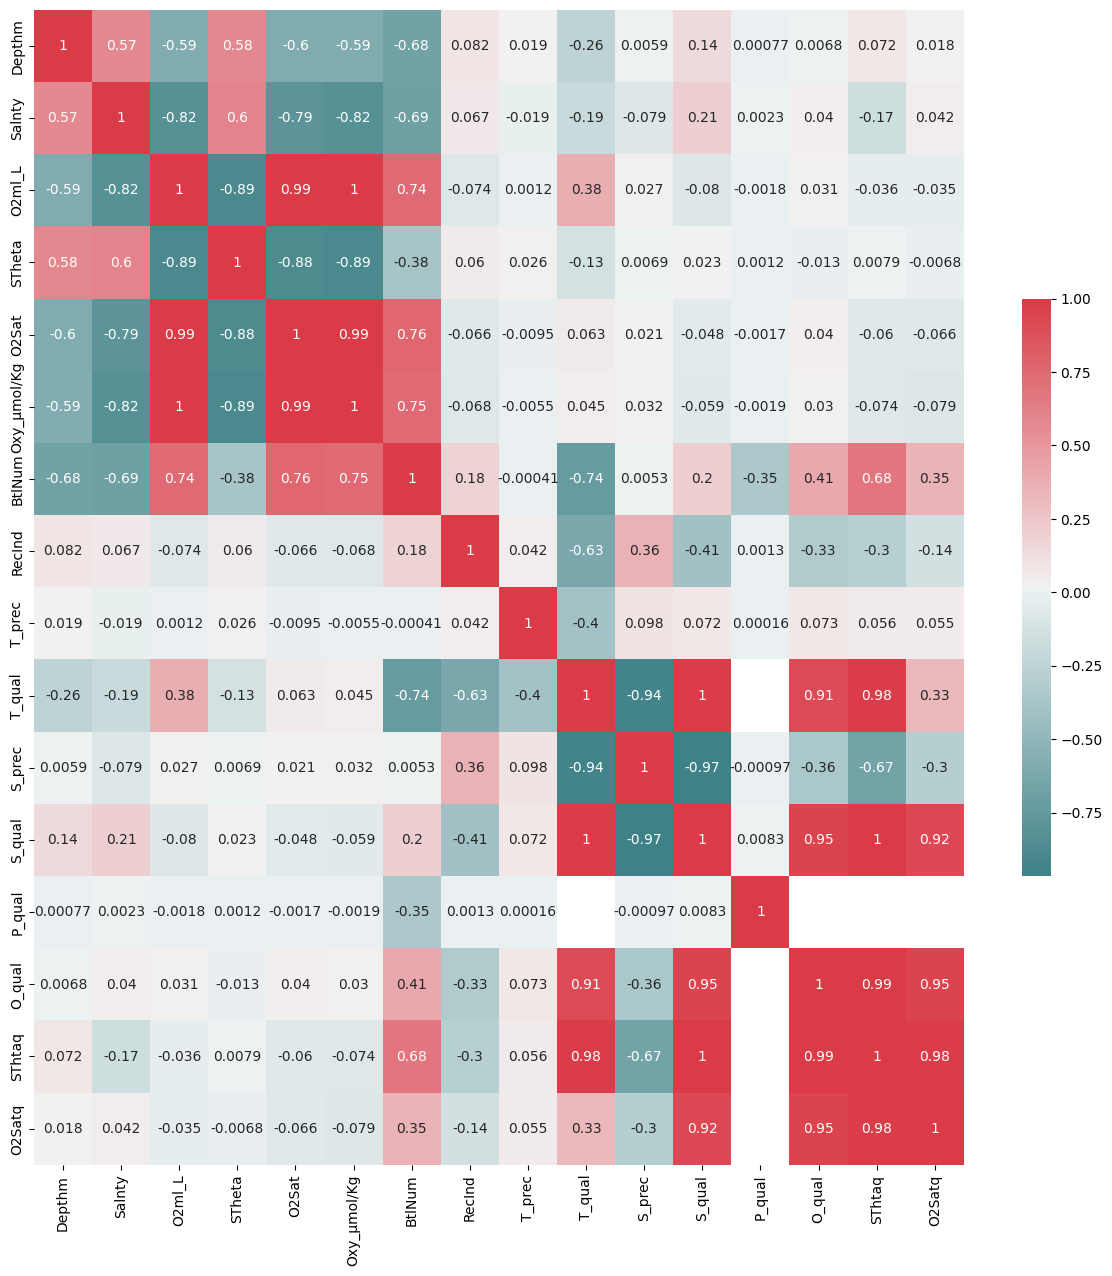

In [7]:
# Compute the correlation matrix
corr = calcofi_subset.drop(['T_degC'], axis=1).corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, cbar_kws={"shrink": .5});

In [8]:
corr_with_temp = calcofi_subset.corr()['T_degC'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
corr_with_isi.drop('T_degC').plot.bar()
plt.show();

NameError: name 'corr_with_isi' is not defined

<Figure size 1000x1000 with 0 Axes>

In [ ]:
dataframe = calcofi_subset.filter(items=['T_degC', 'Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg'])
dataframe.isnull().sum()

In [ ]:
# Let's compare for each variable options fillna() vs mean()
fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.T_degC.fillna(dataframe.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.Salnty.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.Salnty.fillna(dataframe.Salnty.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.O2ml_L.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.O2ml_L.fillna(dataframe.O2ml_L.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.STheta.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.STheta.fillna(dataframe.STheta.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.O2Sat.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.O2Sat.fillna(dataframe.O2Sat.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe['Oxy_µmol/Kg'].dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe['Oxy_µmol/Kg'].fillna(dataframe['Oxy_µmol/Kg'].mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [ ]:
def customize_dataset(data):
    dataframe = data.copy(deep=True)
    #select only 7 variables
    dataframe = dataframe.filter(items=['T_degC', 'Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg'])
    #fill na values
    dataframe = dataframe.groupby(dataframe.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
    return dataframe

In [ ]:
dataframe = customize_dataset(calcofi_subset)
dataframe.isnull().sum() 